In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Data/Reviews Data from British Airways.csv")

In [3]:
df.head()

,Unnamed: 0,Reviews
0,0,Not Verified | This was literally one of the ...
1,1,✅ Trip Verified | The usual shambolic unfoldi...
2,2,Not Verified | Lost my case and took 6 weeks ...
3,3,✅ Trip Verified | The incoming and outgoing f...
4,4,✅ Trip Verified | Back in December my family ...


In [4]:
del(df['Unnamed: 0'])

df.head()

,Reviews
0,Not Verified | This was literally one of the ...
1,✅ Trip Verified | The usual shambolic unfoldi...
2,Not Verified | Lost my case and took 6 weeks ...
3,✅ Trip Verified | The incoming and outgoing f...
4,✅ Trip Verified | Back in December my family ...


In [5]:
# getting the verified and unverified reviews from the dataset 

verified_reviews = 0
unverified_reviews = 0

df['Verified'] = 0

for i in range(0, len(df['Reviews'])):
    if df['Reviews'][i][0] == '✅':
        verified_reviews += 1
        df['Verified'][i] = 1
    else:
        unverified_reviews += 1
        
print('verified reviews : ', verified_reviews)
print('unverified reviews : ', unverified_reviews)

C:\Users\prath\AppData\Local\Temp\ipykernel_16776\2856956275.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Verified'][i] = 1


verified reviews :  736
unverified reviews :  174


In [6]:
df.head()

,Reviews,Verified
0,Not Verified | This was literally one of the ...,0
1,✅ Trip Verified | The usual shambolic unfoldi...,1
2,Not Verified | Lost my case and took 6 weeks ...,0
3,✅ Trip Verified | The incoming and outgoing f...,1
4,✅ Trip Verified | Back in December my family ...,1


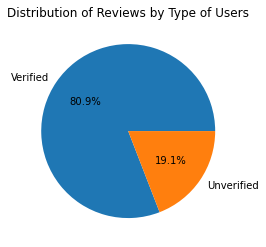

In [25]:
df2 = pd.DataFrame({'review_type': ['Verified', 'Unverified'],
                   'count': [verified_reviews, unverified_reviews]})

# create a pie chart
plt.pie(df2['count'], labels=df2['review_type'], autopct='%1.1f%%')

# add title
plt.title('Distribution of Reviews by Type of Users')

# show the plot
plt.show()

In [7]:
# performing the sentiment analysis on the review
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [8]:
sentiment = SentimentIntensityAnalyzer()

In [9]:
sent1 = 'Very good taste, best of the best taste and dishes, world famous cuisine and world class taste'

res1 = sentiment.polarity_scores(sent1)

print(res1)

{'neg': 0.0, 'neu': 0.541, 'pos': 0.459, 'compound': 0.9162}


In [10]:
df['Negative'] = 0
df['Neutral'] = 0
df['Positive'] = 0
df['Compound'] = 0
df.head()

,Reviews,Verified,Negative,Neutral,Positive,Compound
0,Not Verified | This was literally one of the ...,0,0,0,0,0
1,✅ Trip Verified | The usual shambolic unfoldi...,1,0,0,0,0
2,Not Verified | Lost my case and took 6 weeks ...,0,0,0,0,0
3,✅ Trip Verified | The incoming and outgoing f...,1,0,0,0,0
4,✅ Trip Verified | Back in December my family ...,1,0,0,0,0


In [11]:
for i in range(0, len(df)):
    review = df['Reviews'][i]
    
    res = sentiment.polarity_scores(review)
    
    df['Negative'][i] = res['neg']
    df['Neutral'][i] = res['neu']
    df['Positive'][i] = res['pos']
    df['Compound'][i] = res['compound']

C:\Users\prath\AppData\Local\Temp\ipykernel_16776\3151981616.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Negative'][i] = res['neg']
C:\Users\prath\AppData\Local\Temp\ipykernel_16776\3151981616.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Neutral'][i] = res['neu']
C:\Users\prath\AppData\Local\Temp\ipykernel_16776\3151981616.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Positive'][i] = res['pos']
C:\Users

In [12]:
df.head()

,Reviews,Verified,Negative,Neutral,Positive,Compound
0,Not Verified | This was literally one of the ...,0,0.135,0.817,0.049,-0.9253
1,✅ Trip Verified | The usual shambolic unfoldi...,1,0.093,0.850,0.057,-0.9764
2,Not Verified | Lost my case and took 6 weeks ...,0,0.011,0.976,0.013,0.1341
3,✅ Trip Verified | The incoming and outgoing f...,1,0.166,0.789,0.045,-0.9263
4,✅ Trip Verified | Back in December my family ...,1,0.043,0.920,0.037,-0.4196


In [13]:
# rounding up the values for better analysis
df['Compound'] = np.round(df['Compound'])

In [14]:
df.head(10)

,Reviews,Verified,Negative,Neutral,Positive,Compound
0,Not Verified | This was literally one of the ...,0,0.135,0.817,0.049,-1.0
1,✅ Trip Verified | The usual shambolic unfoldi...,1,0.093,0.850,0.057,-1.0
2,Not Verified | Lost my case and took 6 weeks ...,0,0.011,0.976,0.013,0.0
3,✅ Trip Verified | The incoming and outgoing f...,1,0.166,0.789,0.045,-1.0
4,✅ Trip Verified | Back in December my family ...,1,0.043,0.920,0.037,-0.0
5,✅ Trip Verified | As usual the flight is dela...,1,0.023,0.949,0.028,0.0
6,✅ Trip Verified | A short BA euro trip and thi...,1,0.015,0.740,0.245,1.0
7,Not Verified | We are flying Business class f...,0,0.033,0.944,0.023,-0.0
8,✅ Trip Verified | I am in Australia and on Fr...,1,0.054,0.940,0.007,-1.0
9,✅ Trip Verified | At 7.54 am on the day of tr...,1,0.136,0.787,0.077,-1.0


C:\Users\prath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Revies based on Analysis')

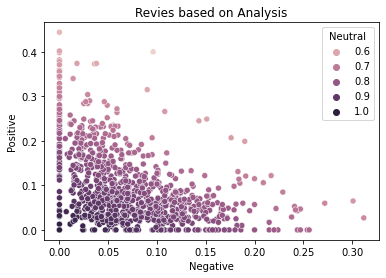

In [15]:
sns.scatterplot(df['Negative'], df['Positive'], hue=df['Neutral'])
plt.xlabel('Negative')
plt.ylabel('Positive')
plt.title('Revies based on Analysis')

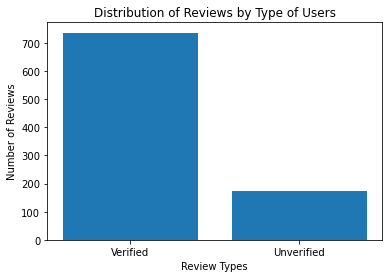

In [16]:
df2 = pd.DataFrame({'review_type': ['Verified', 'Unverified'],
                   'count': [verified_reviews, unverified_reviews]})

# create a bar chart
plt.bar(df2['review_type'], df2['count'])

# add labels and title
plt.xlabel('Review Types')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Reviews by Type of Users')

# show the plot
plt.show()

In [49]:
positive_reviews = (df['Compound'] == 1).sum()
negative_reviews = (df['Compound'] == -1).sum()
neutral_reviews = (df['Compound'] == 0).sum()

print('Positive : ', positive_reviews)
print('Negative : ', negative_reviews)
print('Neutral : ', neutral_reviews)

verified_positive = 0
verified_negative = 0
unverified_positive = 0
unverified_negative = 0
for i in range(0, len(df)):
    if df['Compound'][i] == 1 and df['Verified'][i] == 1:
        verified_positive += 1
    if df['Compound'][i] == 1 and df['Verified'][i] == 0:
        unverified_positive += 1
    if df['Compound'][i] == -1 and df['Verified'][i] == 1:
        verified_negative += 1
    if df['Compound'][i] == -1 and df['Verified'][i] == 0:
        unverified_negative += 1

print('')
print('Verified Positive : ', verified_positive)
print('Unverified Positive : ', unverified_positive)

print('Verified Negative : ', verified_negative)
print('Unverified Negative : ', unverified_negative)

Positive :  400
Negative :  323
Neutral :  187

Verified Positive :  327
Unverified Positive :  73
Verified Negative :  266
Unverified Negative :  57


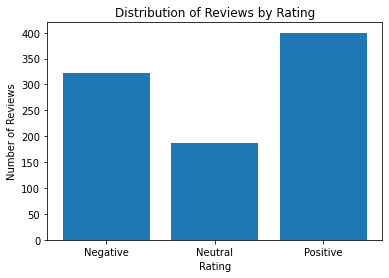

In [18]:
df1 = pd.DataFrame({'rating': ['Negative', 'Neutral', 'Positive'],
                   'count': [negative_reviews, neutral_reviews, positive_reviews]})

# create a bar chart
plt.bar(df1['rating'], df1['count'])

# add labels and title
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Reviews by Rating')

# show the plot
plt.show()

In [21]:
df.to_csv('Updated Reviews Data.csv')
df.to_excel('Updated Reviews Data.xlsx')

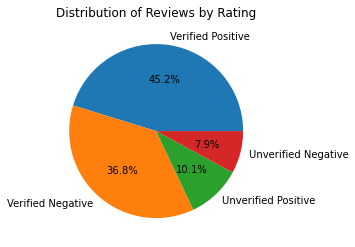

In [50]:
df1 = pd.DataFrame({'rating': ['Verified Positive', 'Verified Negative', 'Unverified Positive', 'Unverified Negative'],
                   'count': [verified_positive, verified_negative, unverified_positive, unverified_negative]})

# create a bar chart
plt.pie(df1['count'], labels=df1['rating'], autopct='%1.1f%%')

# add labels and title
plt.title('Distribution of Reviews by Rating')

# show the plot
plt.show()